In [1]:
import pandas as pd
from itertools import zip_longest
from IPython.display import HTML as html_print
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re

In [2]:
test = pd.read_csv('/home/martinha/PycharmProjects/protein/viral_fp/viral_fp_new/datasets/test.csv')
test = test.sort_values(by=['idProtein'])
test

idProtein                                            Name Class  \
2        105                           Envelope glycoprotein     I   
6        146                              Genome polyprotein    II   
5        158                              Genome polyprotein    II   
0        192                            Spike glycoprotein S     I   
7        225  Envelope glycoprotein gp160 (Env polyprotein)      I   
1        265  Envelope glycoprotein gp160 (Env polyprotein)      I   
4        574         Pre-glycoprotein polyprotein GP complex     I   
3        618                          fusion glycoprotein F0     I   
8        779                                  G glycoprotein   III   
9        804                              Spike glycoprotein     I   

                  Activation       Name_Fusogenic_Unit Location_Fusogenic  \
2        binding to receptor     Envelope protein p15E            466-644   
6                        NaN  Envelope glycoprotein E1            192-384   
5                        NaN  Envelope glycoprotein E1            192-383   
0  interacting with receptor                 Corona S2           759-1353   
7        binding to receptor      gp41 - by similarity            499-843   
1        binding to receptor      gp41 - by similarity            488-832   
4                     low pH                       GP2            266-498   
3        binding to receptor                        F1            102-537   
8                     low pH                        H2                NaN   
9        binding to receptor                        S2           686-1273   

                                  Sequence_fusogenic UniProtID  NcbiID  \
2  DPISLTVALMLGGITVGGMARNRNRDCGLLETAQFRQLQMAMHTDI...    P21443     NaN   
6  LEYRNASGLYLLTNDCSNRSIVYEADDVILHLPGCVPCVETDNNNT...    Q81487     NaN   
5  LEYRNASGLYTVTNDCSNGSIVYEAGDVILHLPGCIPCVRLNNASK...    Q68801     NaN   
0  AITTGYRFTNFEPFTVNSVNDSLEPVGGLYEIQIPSEFTIGNMVEF...    P36334     NaN   
7  AVGMGAVLFGFLGAAGSTMGAAAITLTAQARQLLSGIVQQQSNLLK...    Q9QBZ4     NaN   
1  AAGLGALFLGFLGDSREHMGAASITLTVQARQLLSGIVQQQNNLLR...    Q9QSQ7     NaN   
4  GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAVAKCNVNH...    P07399     NaN   
3  FLGLILGLGAAVTAGVALAKTVQLESEIALIRDAVRNTNEAVVSLT...    P35949     NaN   
8  MKCLLYLAFLSIGVNCKFTIVFPHNQKGTWKNVPSNYHYCPSSSDL...       NaN     NaN   
9  SVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSM...    P0DTC2     NaN   

   idTaxonomy  ...  idTaxonomy.1                                CommonName  \
2         105  ...           105     Feline leukemia virus (isolate CFE-6)   
6         146  ...           146                         Hepatitis C virus   
5         158  ...           158                         Hepatitis C virus   
0         192  ...           192                         Human Coronavirus   
7         225  ...           225              Human immunodeficiency virus   
1         265  ...           265              Human immunodeficiency virus   
4         574  ...           574        Lymphocytic choriomeningitis virus   
3         618  ...           618  Murine pneumonia virus (strain 15) (MPV)   
8         774  ...           774                Vesicular stomatitis virus   
9         804  ...           804                                SARS-CoV-2   

           Family             Genre  \
2   Retroviridae    Gammaretrovirus   
6    Flaviviridae       Hepacivirus   
5    Flaviviridae       Hepacivirus   
0   Coronaviridae   Betacoronavirus   
7    Retroviridae        Lentivirus   
1    Retroviridae        Lentivirus   
4    Arenaviridae    Mammarenavirus   
3  Pneumoviridae   Orthopneumovirus   
8   Rhabdoviridae     Vesiculovirus   
9   Coronaviridae   Betacoronavirus   

                                       Species  \
2                        Feline leukemia virus   
6                                Hepacivirus C   
5                                Hepacivirus C   
0                            Betacoronavirus 1   
7               Human immunode

In [3]:
# run https://dtu.biolib.com/DeepTMHMM on 2022/12/29
tmd = {'192':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '265': 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '105':'SSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIII',
       '618':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII',
       '574':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '158':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMIMMMMMMMMMMOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMMMMMI',
      '146':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMMMMMMI',
       '225':'SSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
      '779':'SSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII',
      '804':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'
      }

Functions to plot the scores predicted in the sequence.

In [4]:
   
# get html element
def cstr(s, bold, color='black'):
    if s == ' ':
        return "<text style=color:#000;padding-left:10px;background-color:{}> </text>".format(color, s)
    else:
        if bold == 'b':
            return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
#         if tmd == 't':
#             return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
        else:
            return "<text style=color:#000;background-color:{}>{} </text>".format(color, s)

    #             return "<text style=color:#000;padding-left:10px;background-color:{}> <{}> </text> </{}>".format(bold,color,s,bold)
#             return "<text style=color:#000;background-color:{}>{} <{}> </text> </{}>".format(color,s,bold,bold) 

# print html
def print_color(t, bold_letter):
#     for i in range(len(t)):
#         ti = t[i][0]
#         ci = t[i][1]
#         bi = bold_letter[i][1]
    display(html_print(''.join([cstr(t[i][0],bold_letter[i][1], color=t[i][1]) for i in range(len(t))])))
#     display(html_print(''.join([cstr(ti, color=ci, bi) for ti,ci in t])))
#     display(html_print(''.join([bold(ti, bi) for ti,bi in bold_letter])))

# get appropriate color for value
def get_clr(value):
    cmap = cm.get_cmap('YlOrRd')  
    rgba = cmap(value)
    # rgb2hex accepts rgb or rgba
    col = matplotlib.colors.rgb2hex(rgba)
    return col
    
#check if this is ok
window = 21
def get_scores_seq(seq,file_predict, mode='max'):

    list_scores=[]

    
    #for each subseq
    for i in range(len(seq)-1):
        posi = i
        posf = posi+window #window_size
        
#         score = round(float(new_df['class predicted'][i]),4)
        
        if len(file_predict.columns)>2: # tem proba
#             score_0 = round(float(new_df['prob_class_0'][i]),4)   
#             score_1 = round(float(new_df['prob_class_1'][i]),4)
            score_column = 'prob_class_1'
        else:
            score_column = 'class predicted'
            
        # try put all the values in a list of the scores . each letter has a list of values of the scores in which that letter appear
        if i+window < len(file_predict):
            val = file_predict[score_column][i:posf]
        elif i >= len(file_predict):
            val = [file_predict[score_column][file_predict.shape[0]-1]]
        else: 
            val = file_predict[score_column][i:]
            
        if mode == 'max':
            new_val = max(val) # np.mean
        elif mode == 'mean':
            new_val = np.mean(val)
        list_scores.append(round(float(new_val),4))
    return list_scores


def graphic(new_score):
    plt.plot(new_score)
    plt.show()
    

def visualize(file_predict, seq, location, mode): 
    new_score = get_scores_seq(seq,file_predict,mode)

    graphic(new_score)
    text_colours = []
    bold_letter = []
    for i in range(len(seq)-2):
        text = (seq[i], get_clr(new_score[i]))
        text_colours.append(text)
        
        if type(location) == list: 
            # '[(85, 93), (129, 136)]'' : # bipartid
            if i in range(location[0][0], location[0][1]-1):
              bold_letter.append((seq[i],'b'))
            elif i in range(location[1][0], location[1][1]-1):
              bold_letter.append((seq[i],'b'))      
            else:
              bold_letter.append((seq[i],np.nan))
                    
        else: # all the others peptides
            if i in range(location[0], location[1]-1):
                bold_letter.append((seq[i],'b'))
            else:
                bold_letter.append((seq[i],np.nan))
    
    # location in bold or box around 
    print_color(text_colours, bold_letter)

def visualize_tmd(tmd_str, sequence_fusogenic):
    score_list = []
    bold_letter = []
    text_colours = []
    tmd = []
    signal= []
    for i in range(len(tmd_str)):   #'OSMI'
        ch = tmd_str[i]
        aa = sequence_fusogenic[i]


        if ch == 'M':
            membrane = 0.9
            tmd.append(aa)
        elif ch == 'S':
            # its a signal !!!!! just to not change the color 
            membrane = 0.5 # just a number to get colour
            signal.append(aa)
        else:
            membrane = 0

        text = (aa, get_clr(membrane))
        text_colours.append(text)
        bold_letter.append('none')
        score_list.append(membrane)
        
    print_color(text_colours, bold_letter)
    print('tmd', str(tmd))
    print('signal', str(signal))
        

In [5]:
path_results = '/home/martinha/PycharmProjects/protein/viral_fp/viral_fp_new/src/classify_segments/results/'

def output(model_name_specific):
    
    for idProtein in test['idProtein']: 
        print('################################')
        print(idProtein)

        file_predict = pd.read_csv(path_results+model_name_specific + '/TESTSEQ{}.csv'.format(idProtein))

        test_id = test.loc[test['idProtein'] == idProtein]

        true_subseq = str(test_id['seq_vfp'].values[0])
        fusogenic = str(test_id['Sequence_fusogenic'].values[0])

        print(test_id['Name'].values[0])

        tmd_predict = tmd[str(idProtein)]    

        # index of true vfp
        print(true_subseq)
        if idProtein == 779: # éo bipartido
            true_subseq1 = 'FRWYGPKY'
            true_subseq2 = 'CGYATVT'
            index_of_vfp1 =  fusogenic.index(true_subseq1)
            index_of_vfp2 =  fusogenic.index(true_subseq2)
            location_of_vfp1 = (index_of_vfp1, index_of_vfp1 + len(true_subseq1))
            location_of_vfp2 = (index_of_vfp2, index_of_vfp2 + len(true_subseq2))
            location_of_vfp = [location_of_vfp1, location_of_vfp2]

        else:
        
            index_of_vfp =  fusogenic.index(true_subseq)
            location_of_vfp = (index_of_vfp, index_of_vfp + len(true_subseq))
        
        
        print('vfp model prediction')
        # plot the vfp model predictions 

        mode = 'max' # or 'mean'   value of each letter . 
        #the score although is by position represents the score for that position + 21. decide how to score each position.  

        visualize(file_predict, seq = fusogenic, location = location_of_vfp, mode=mode)

        print('tmd prediction by DeepTMHMM')
        visualize_tmd(tmd_predict,fusogenic)


        # ### relevant info 
        score_of_true_vfp = file_predict.loc[index_of_vfp]['class predicted']
        print('vfp predicted:', score_of_true_vfp )
        if len(file_predict.columns)>2 : # tem proba
            score_of_true_vfp_0 = file_predict.loc[index_of_vfp]['prob_class_0']
            score_of_true_vfp_1 = file_predict.loc[index_of_vfp]['prob_class_1']
            print('score vfp predicted:', score_of_true_vfp_1)
            df_sorted = file_predict.sort_values(by='prob_class_1', ascending=False)
            print('\n max score predicted')
            print('\n top scores')
            print(df_sorted[:5])

        print('index of true', index_of_vfp)
    #     print(file_predict.loc[file_predict['class predicted']==1])

# Physicochemical Machine learning 


True Viral Fusion Peptides are underlined. Red scores are the highest values. 

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


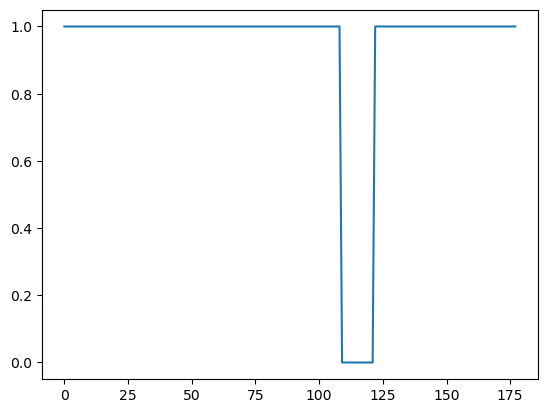

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


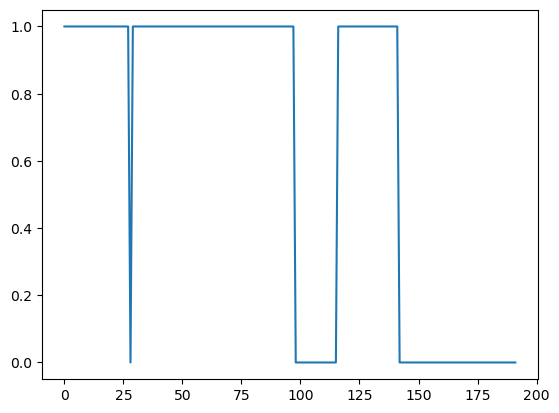

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


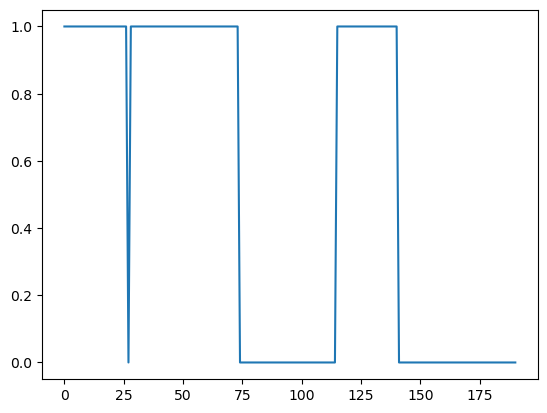

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
index of true 73
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


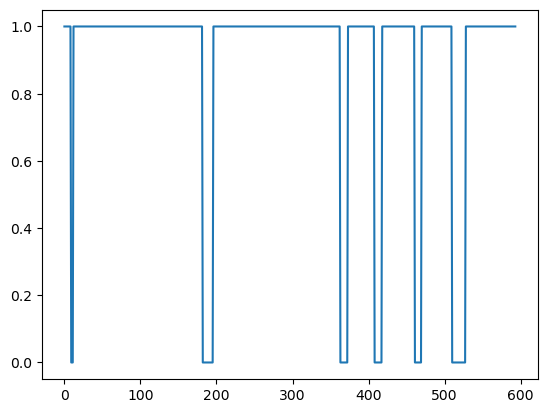

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


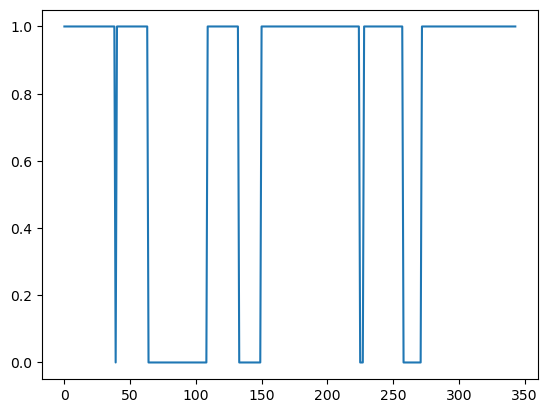

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


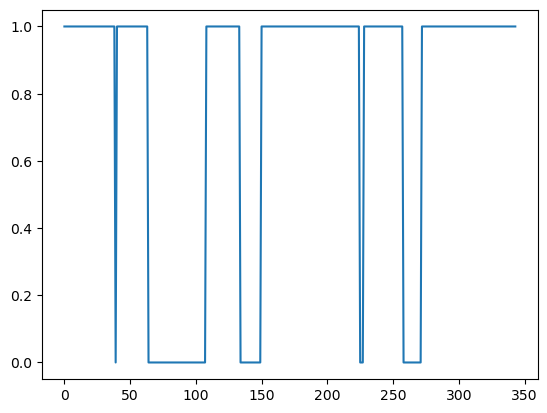

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


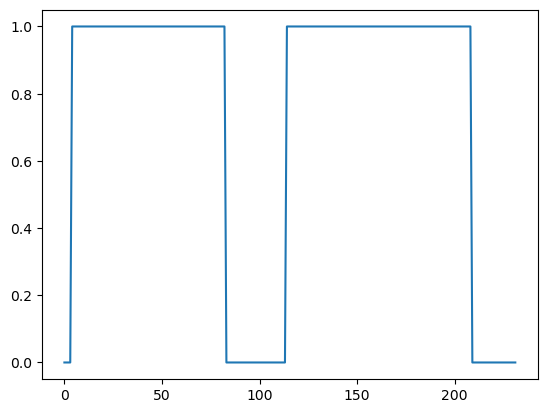

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


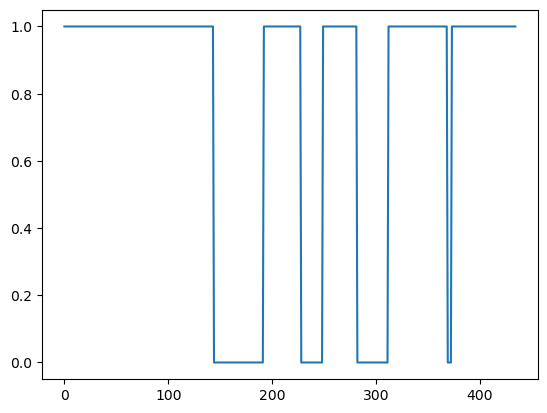

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


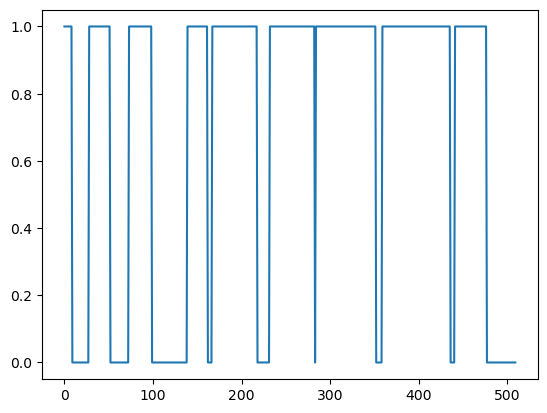

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT
vfp model prediction


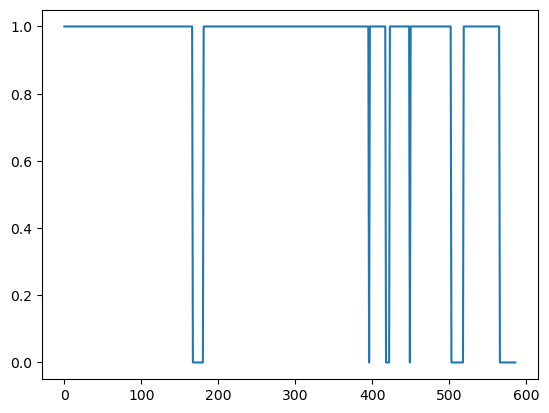

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 1
index of true 130


In [15]:
# model_name_specific = 'ml/All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # 3 right. 1 wrong. 1 sars
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc_prob_weights' # 3 right. 1 wrong. 1 sars very close t just svc
# model_name_specific = 'ml/All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # predicts 2 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf_weights' # gets 2 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'   # gets 2 

# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting' # it gets 2 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf' # it gets 2 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc' # predits 3 well. 1 different. and sarscov


model_name_specific = 'ml/Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # really good! 6 right. 1 right with extra wrong.  3 for sarscov 
# model_name_specific = 'ml/Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # predicts a lot of things 

# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting'  # 5 right. 1 wrong. 4 for Sars
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf'  # 5 right. 1 right with plus wrng 1 wrong 3 sarscov
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'  # predits everything



model_name_specific = 'ml/third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc' # 5 right ( 2 have another prediction)  wrong. 3 sarscov
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf' # 3 right. 1 sarscov the rest nothing. 

# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'  # 3 correct 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gnb' # 4 right 2 wrong 3 for sarscov 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_knn' # predicts evrything 
model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_linear_svc' # 7 right 1wrong 4for sarscov 
model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_lr'  # 5 right 1 wrong 4 for sarscov
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # 3 right 1 sarscov
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_sgd' # predicts 2 right. 1 wrong. 1 sarscov 
model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # nice to SEE outros n dá nada. 0 e 1 (n tem prob) 



# model_name_specific = 'third_Window21_gap1_PHYSALL_NONE_10groupedKFOLD_cluster80_linear_svc_try3'
model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_linear_svc'
output(model_name_specific)

# Encoding OHE LSTM

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


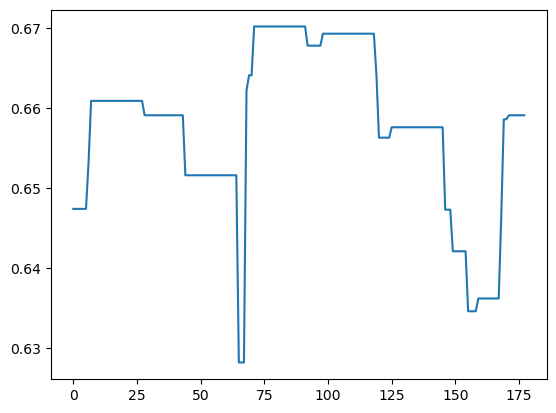

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.6083

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


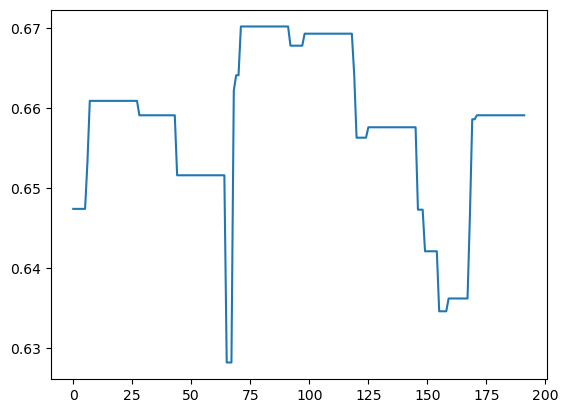

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6123

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


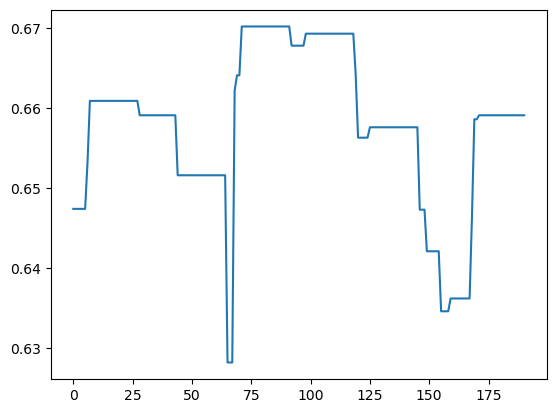

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6263

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 73
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


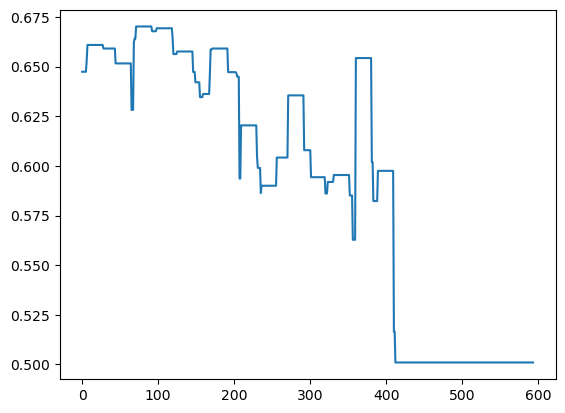

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 1.0
score vfp predicted: 0.5333

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


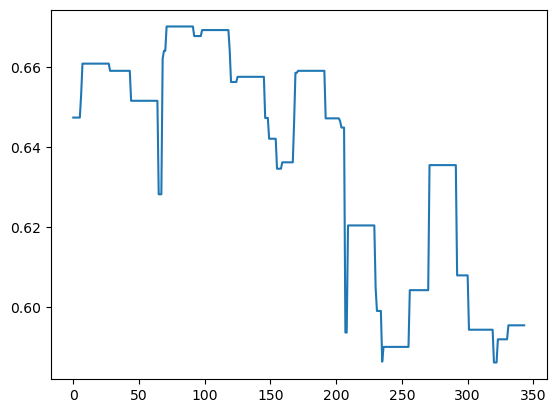

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.6407

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


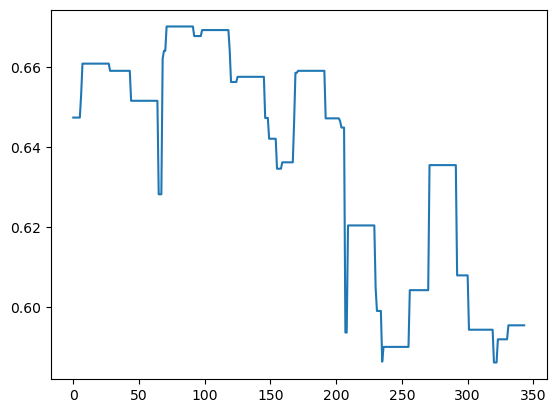

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6407

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


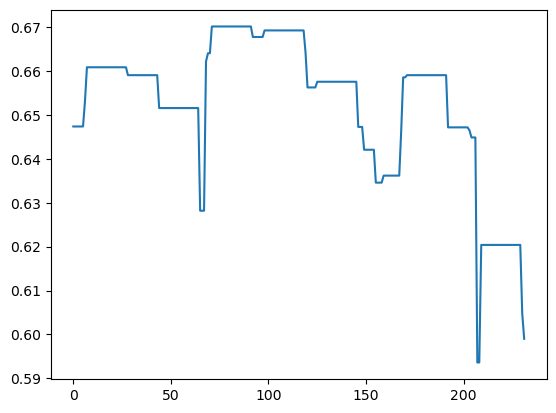

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6407

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


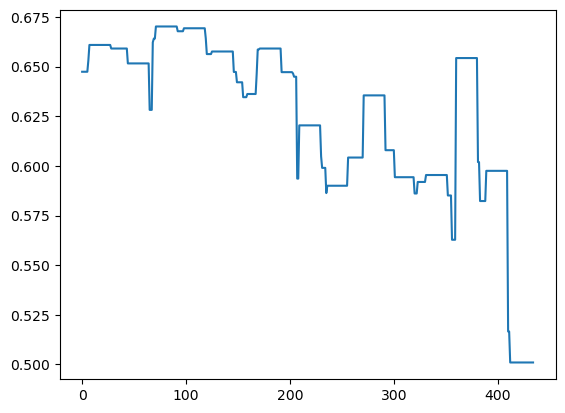

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6407

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


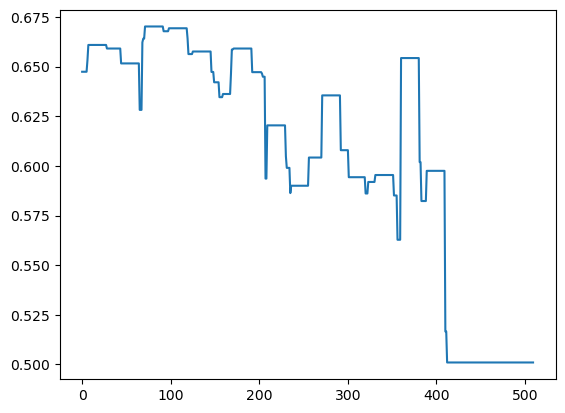

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 1.0
score vfp predicted: 0.6407

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVS

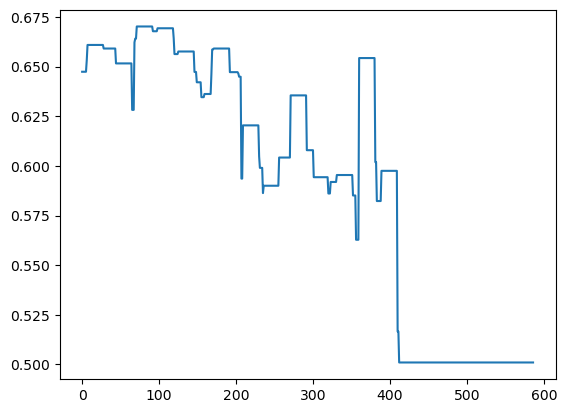

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6244

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
91           91                1        0.3298        0.6702
118         118                1        0.3307        0.6693
104         104                1        0.3322        0.6678
113         113                1        0.3328        0.6672
101         101                1        0.3334        0.6666
index of true 130


In [16]:
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # deu sempre as primeiras sequencias
# model_name_specific = 'dl/third_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # pessimo. tb dá tudo

# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2' # pessimo. tb dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_att_bayesian_cwei'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 

# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV2' #  melhor mas pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV4'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'
# 

output(model_name_specific)

# WE ML

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


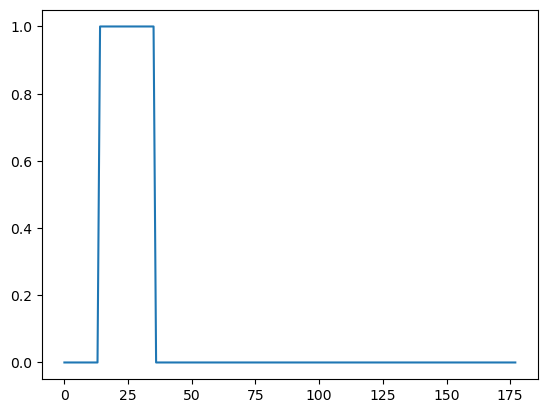

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
35           35                1           0.0           1.0
34           34                1           0.0           1.0
0             0                0           1.0           0.0
111         111                0           1.0           0.0
104         104                0           1.0           0.0
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


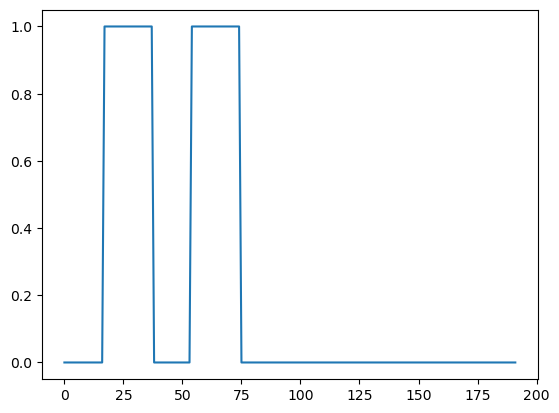

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
37           37                1           0.0           1.0
74           74                1           0.0           1.0
0             0                0           1.0           0.0
119         119                0           1.0           0.0
112         112                0           1.0           0.0
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


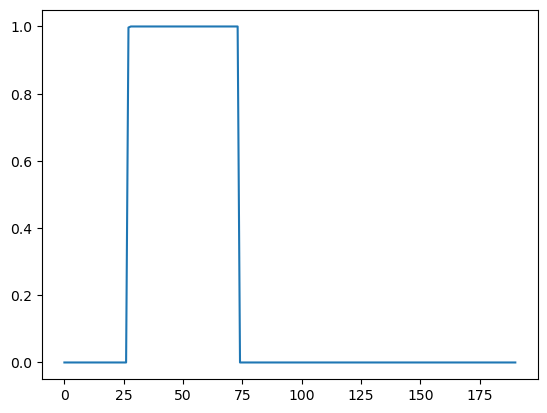

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
64          64                1        0.0000        1.0000
48          48                1        0.0000        1.0000
62          62                1        0.0000        1.0000
73          73                1        0.0000        1.0000
47          47                1        0.0031        0.9969
index of true 73
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


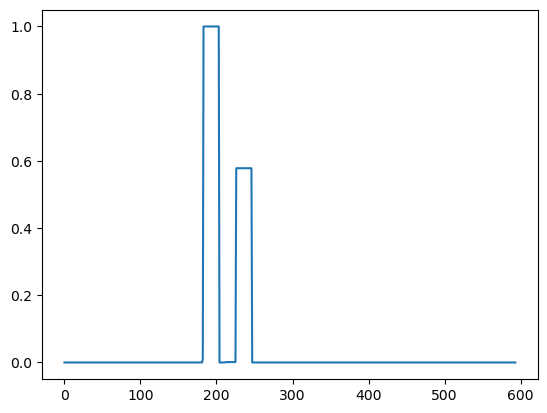

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
203         203                1        0.0000        1.0000
246         246                1        0.4219        0.5781
202         202                0        0.9905        0.0095
232         232                0        0.9988        0.0012
0             0                0        1.0000        0.0000
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


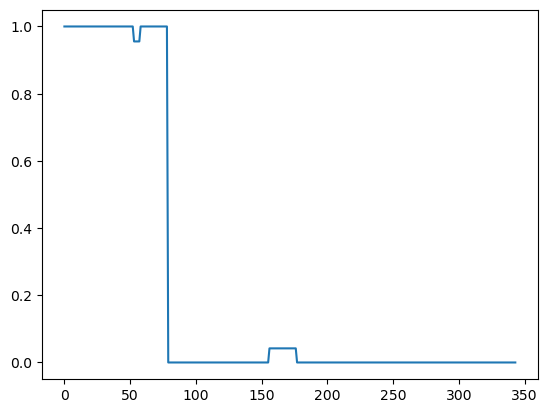

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
0            0                1           0.0           1.0
17          17                1           0.0           1.0
78          78                1           0.0           1.0
33          33                1           0.0           1.0
13          13                1           0.0           1.0
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


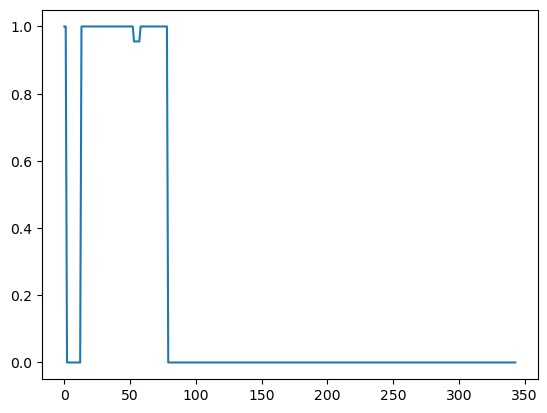

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
0            0                1           0.0           1.0
78          78                1           0.0           1.0
33          33                1           0.0           1.0
52          52                1           0.0           1.0
1            1                1           0.0           1.0
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


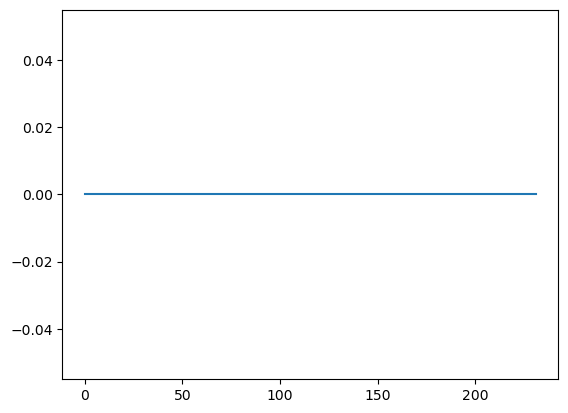

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                0           1.0           0.0
134         134                0           1.0           0.0
136         136                0           1.0           0.0
137         137                0           1.0           0.0
138         138                0           1.0           0.0
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


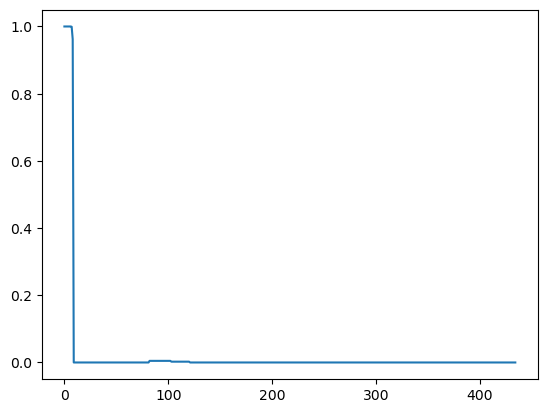

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
5           5                1           0.0           1.0
6           6                1           0.0           1.0
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


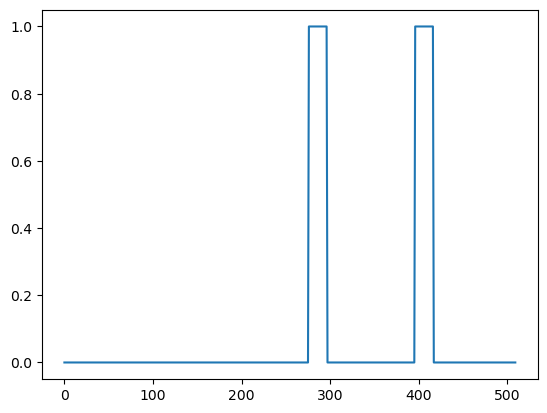

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
296         296                1           0.0           1.0
416         416                1           0.0           1.0
0             0                0           1.0           0.0
323         323                0           1.0           0.0
335         335                0           1.0           0.0
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGT

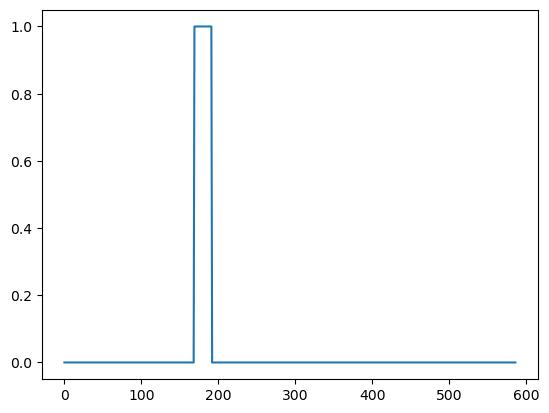

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
191         191                1        0.0000        1.0000
189         189                1        0.0000        1.0000
190         190                1        0.0963        0.9037
0             0                0        1.0000        0.0000
380         380                0        1.0000        0.0000
index of true 130


In [6]:
# WE method in each protein gets 100 dim. MEthod 3 
 
# model_name_specific = 'all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc'  #  
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc_m3' # 5 right. 1wrong . 1SARSCOV

# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf_m3' #  gets 2. doesnt predict anything else 
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gboosting' # gets 3 . 2 wrong. 1 sarscov
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # 4 correct 1 half way 2 wrong 1 sarscov
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # predicts more than 1 subsequence. 7 right. but always with others


# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf' # 4 correct3 3 corrected with more predictions. 2 Sarscov
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # predicts more than 1 sequence. 3 right. 2 wrong. some predicts too much 
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn'   # a lot of stuff 
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # Predicts more than one sequence
#
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf' # gets 5. 1 wrong  2 for sarscov
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # gets 3 and 2 with corrected but more predictions. 3 sarscov 
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # gets2. plus 5 where predicts other things. 2 for sarscov 
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # predicts everything





# method 1 each sequence is 19*100
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc_m1' # predicts 4. nothing more. 
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # 2 correct 1 wrong. Does not predict anything else
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # 3 correct. 3 correct with extra seq. 1 sarscov
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_knn' # predicts everything


model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # 6 right predicts everything with 0.4. But it gets right a lot  
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # predicts everything
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # predicts very big subsequences


# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # predicts a lot but not above 0.5. 4 right 1 wrong. 1 sarscov
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # predicts a lot of subsequences
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # predicts a lot but not terrible

output(model_name_specific)


# WE + LSTM  

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


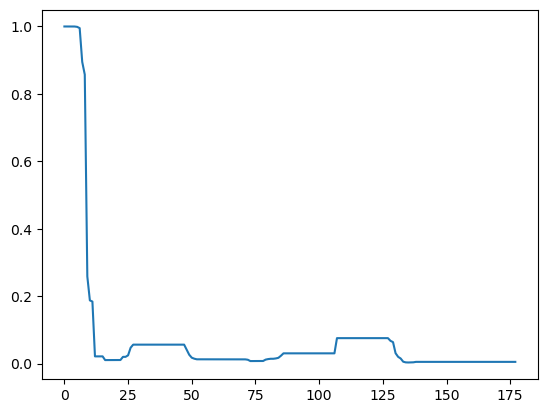

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.9998

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
1           1                1        0.0002        0.9998
2           2                1        0.0002        0.9998
4           4                1        0.0003        0.9997
3           3                1        0.0004        0.9996
5           5                1        0.0013        0.9987
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


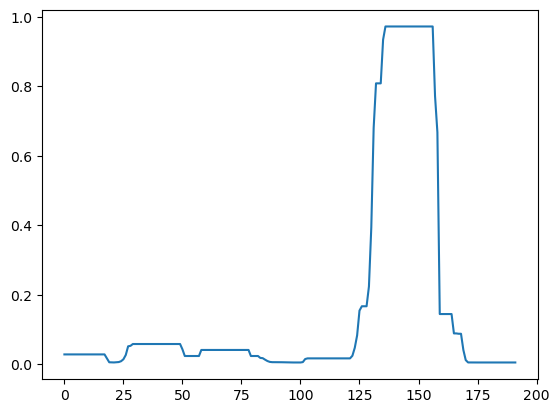

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0129

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
156         156                1        0.0281        0.9719
155         155                1        0.0660        0.9340
152         152                1        0.1917        0.8083
157         157                1        0.2281        0.7719
154         154                1        0.2340        0.7660
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


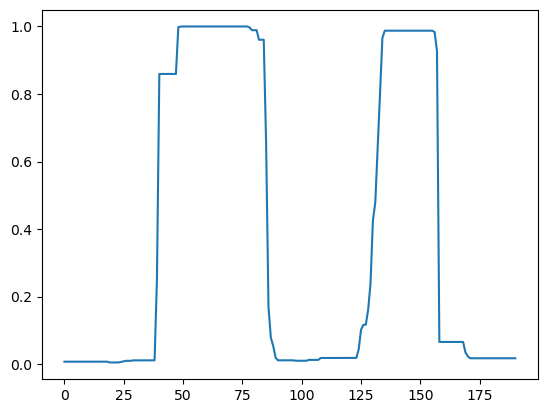

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
72          72                1           0.0           1.0
70          70                1           0.0           1.0
76          76                1           0.0           1.0
77          77                1           0.0           1.0
73          73                1           0.0           1.0
index of true 73
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


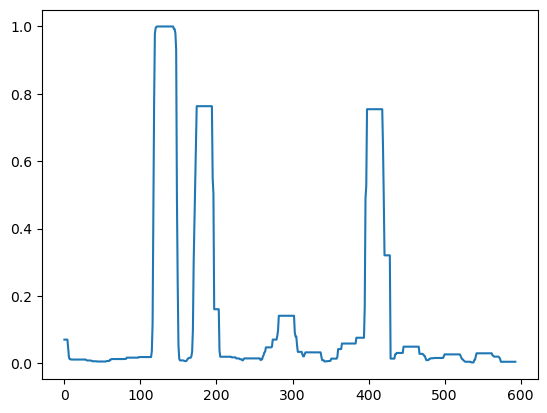

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0373

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
143         143                1        0.0004        0.9996
142         142                1        0.0006        0.9994
141         141                1        0.0011        0.9989
140         140                1        0.0054        0.9946
144         144                1        0.0076        0.9924
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


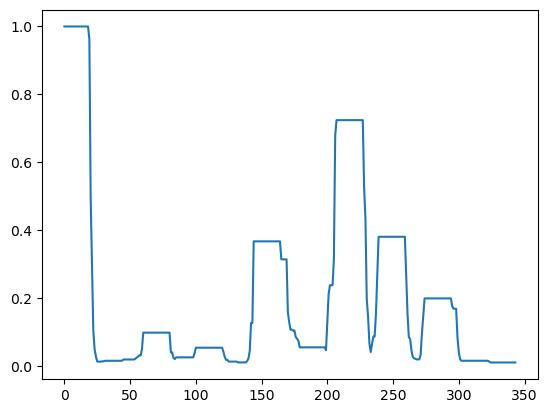

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
0            0                1           0.0           1.0
10          10                1           0.0           1.0
18          18                1           0.0           1.0
17          17                1           0.0           1.0
16          16                1           0.0           1.0
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


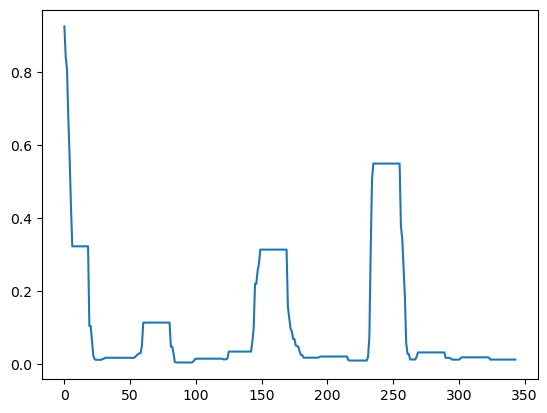

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9243

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.0757        0.9243
1           1                1        0.1584        0.8416
2           2                1        0.1938        0.8062
3           3                1        0.3287        0.6713
4           4                1        0.4358        0.5642
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


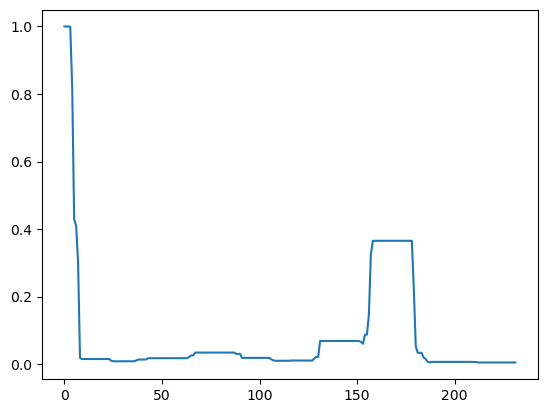

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9999

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
2           2                1        0.0000        1.0000
0           0                1        0.0001        0.9999
1           1                1        0.0001        0.9999
3           3                1        0.0010        0.9990
4           4                1        0.1808        0.8192
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


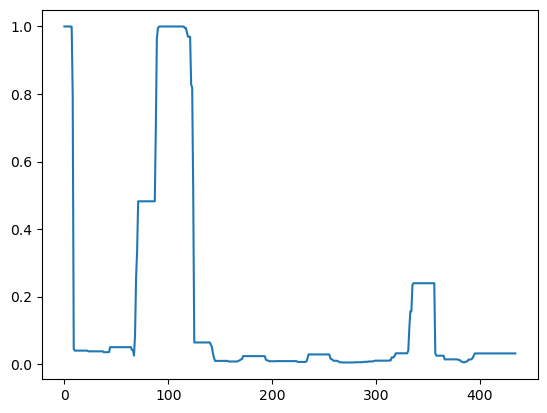

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
1           1                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
4           4                1           0.0           1.0
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


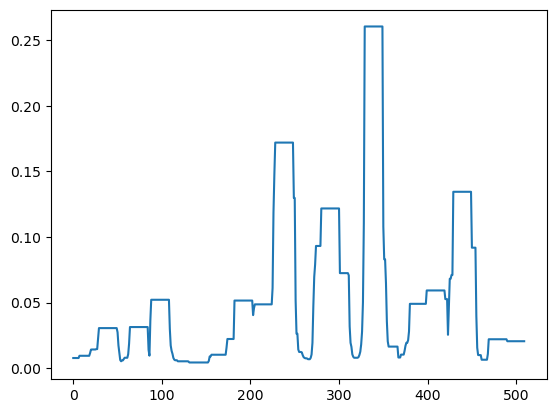

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.003

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
349         349                0        0.7395        0.2605
248         248                0        0.8280        0.1720
247         247                0        0.8524        0.1476
449         449                0        0.8655        0.1345
250         250                0        0.8702        0.1298
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSN

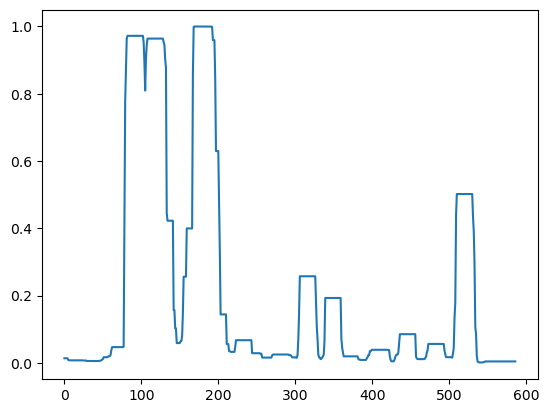

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9446

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
189         189                1        0.0000        1.0000
191         191                1        0.0003        0.9997
190         190                1        0.0003        0.9997
188         188                1        0.0012        0.9988
192         192                1        0.0013        0.9987
index of true 130


In [10]:

model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm1' # gets 4 correct + 2. predicts more sequences
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm2' # 5 correct. + 1 with other seq.  1 wrong good
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm3' # not bad. wosrt than lstm2 and 1
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm4' # 4 correct. 2 correct but other sequence predicted.  
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm5' # # really good check 
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm6' # its worst . but notbad

output(model_name_specific)

# ESM2b representations + ML 

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


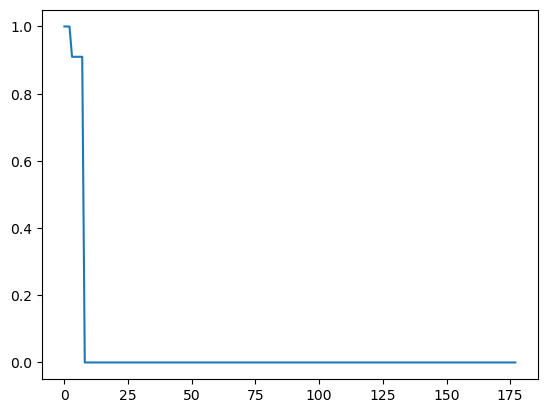

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.0000        1.0000
2           2                1        0.0000        1.0000
1           1                1        0.0000        1.0000
7           7                1        0.0902        0.9098
6           6                1        0.2777        0.7223
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


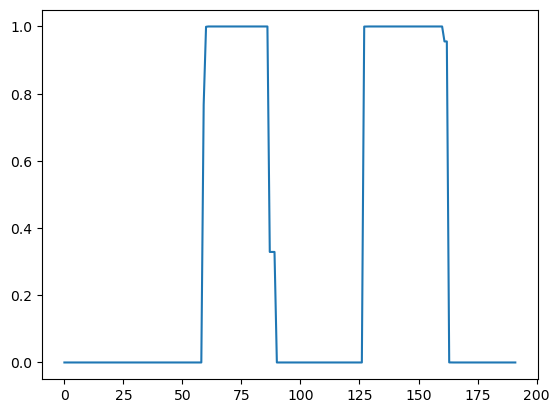

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
86           86                1           0.0           1.0
151         151                1           0.0           1.0
153         153                1           0.0           1.0
154         154                1           0.0           1.0
155         155                1           0.0           1.0
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


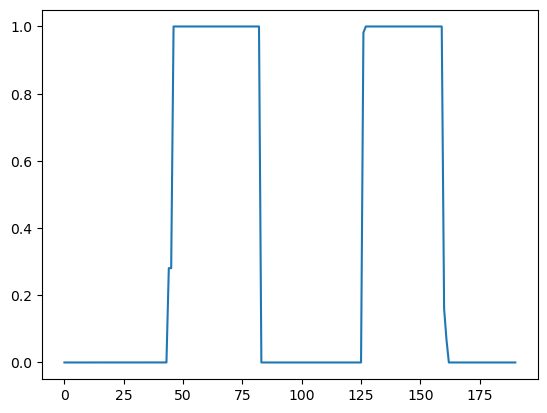

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
151         151                1           0.0           1.0
68           68                1           0.0           1.0
152         152                1           0.0           1.0
150         150                1           0.0           1.0
149         149                1           0.0           1.0
index of true 73
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


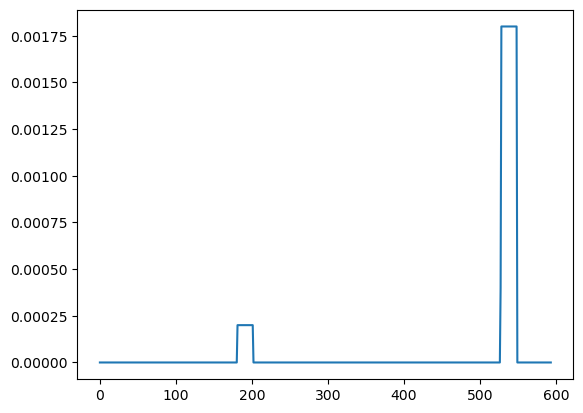

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
548         548                0        0.9982        0.0018
547         547                0        0.9996        0.0004
201         201                0        0.9998        0.0002
380         380                0        1.0000        0.0000
381         381                0        1.0000        0.0000
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


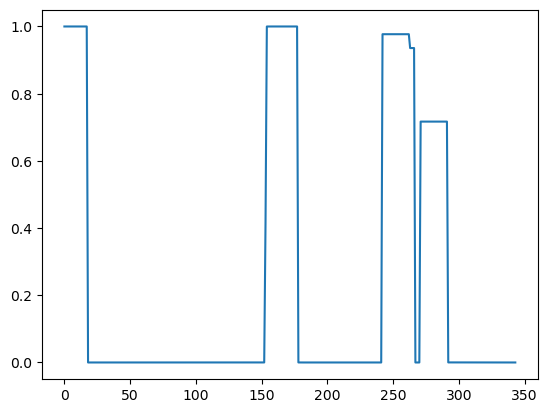

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                1           0.0           1.0
11           11                1           0.0           1.0
1             1                1           0.0           1.0
177         177                1           0.0           1.0
176         176                1           0.0           1.0
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


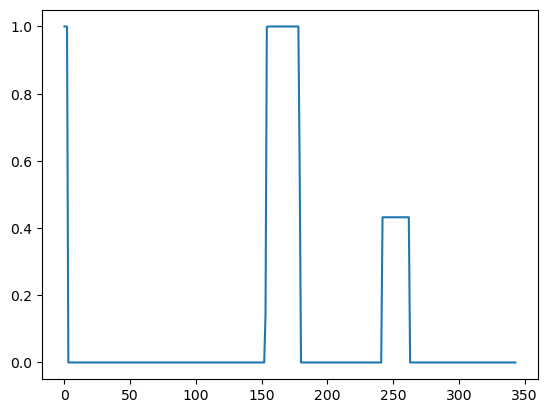

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                1           0.0           1.0
178         178                1           0.0           1.0
175         175                1           0.0           1.0
176         176                1           0.0           1.0
177         177                1           0.0           1.0
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


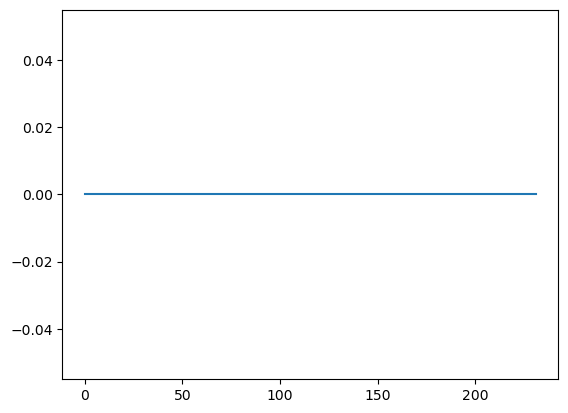

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                0           1.0           0.0
134         134                0           1.0           0.0
136         136                0           1.0           0.0
137         137                0           1.0           0.0
138         138                0           1.0           0.0
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


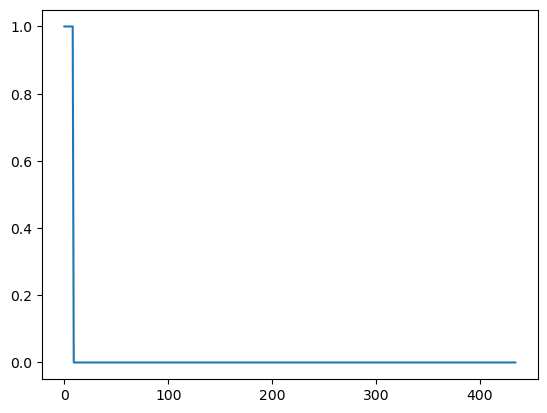

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
4           4                1           0.0           1.0
5           5                1           0.0           1.0
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


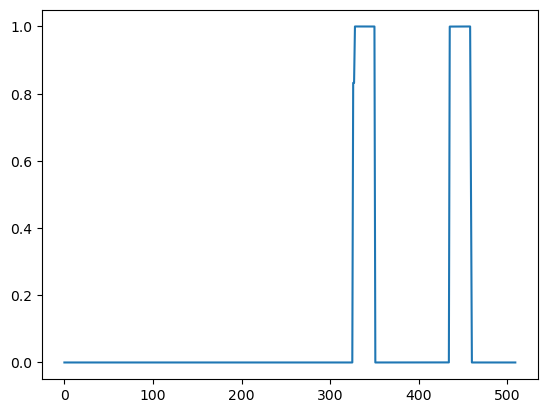

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
458         458                1        0.0000        1.0000
348         348                1        0.0000        1.0000
350         350                1        0.0001        0.9999
455         455                1        0.0003        0.9997
456         456                1        0.0808        0.9192
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGT

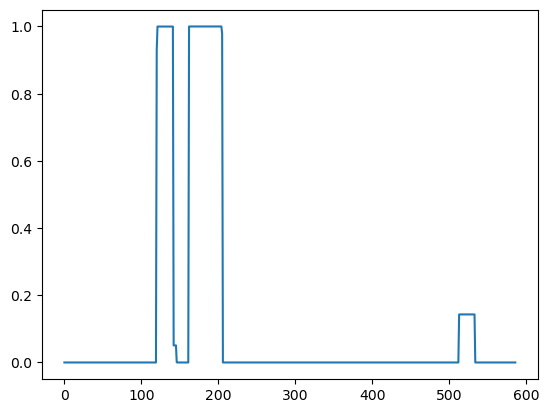

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
184         184                1           0.0           1.0
193         193                1           0.0           1.0
203         203                1           0.0           1.0
202         202                1           0.0           1.0
201         201                1           0.0           1.0
index of true 130


In [9]:


# get the representations nad feed to a model ãfinal é pretrained.esm2_t33_650M_UR50D    (esqueci me de mudar a string)
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # predicts 3 
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # does not predict anything. just 2 (correct)
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau


# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # predicts a lot of things
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb'

# model_name_specific ='ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # predicts a lot
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # predicts always 2 seqs. 


# # o pequeno 
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # predicts 5 correct. the others not predictsanything
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # doesnot predict anything
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # predicts a lot of things

# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # predicts a lot of things
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # predicts in excess

# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # predicts to much 
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # predicts a lot 
model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # not horrible


output(model_name_specific)

# ESM2b representations + DL

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


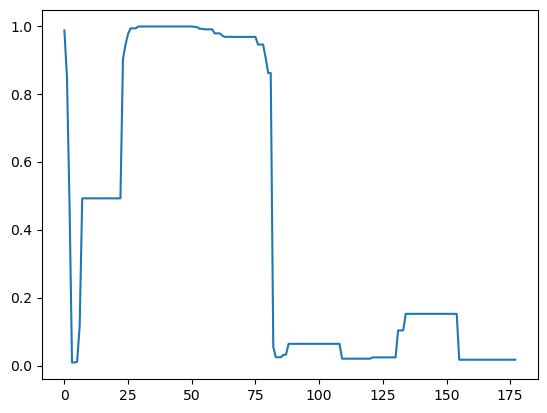

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.8494

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
50          50                1        0.0022        0.9978
49          49                1        0.0024        0.9976
51          51                1        0.0032        0.9968
52          52                1        0.0038        0.9962
46          46                1        0.0077        0.9923
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


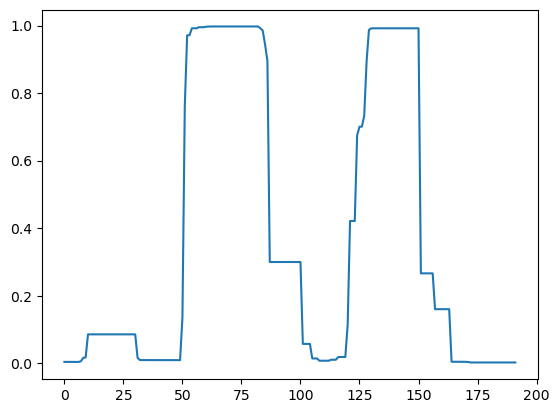

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9919

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
82          82                1        0.0028        0.9972
81          81                1        0.0030        0.9970
80          80                1        0.0036        0.9964
77          77                1        0.0050        0.9950
79          79                1        0.0062        0.9938
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


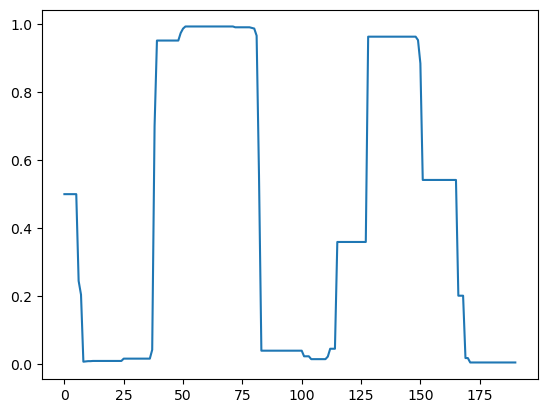

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9543

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
71          71                1        0.0075        0.9925
78          78                1        0.0099        0.9901
79          79                1        0.0116        0.9884
77          77                1        0.0123        0.9877
74          74                1        0.0123        0.9877
index of true 73
################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


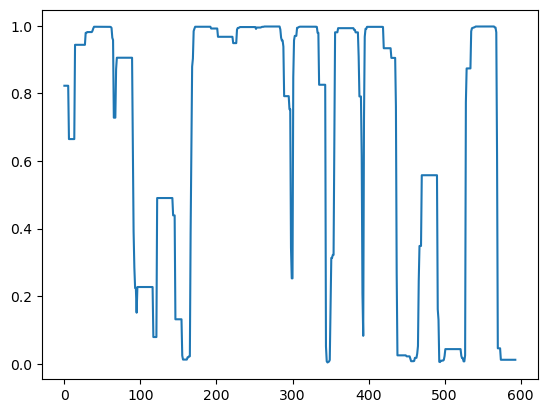

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9647

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
565         565                1        0.0023        0.9977
561         561                1        0.0024        0.9976
283         283                1        0.0024        0.9976
562         562                1        0.0025        0.9975
564         564                1        0.0026        0.9974
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


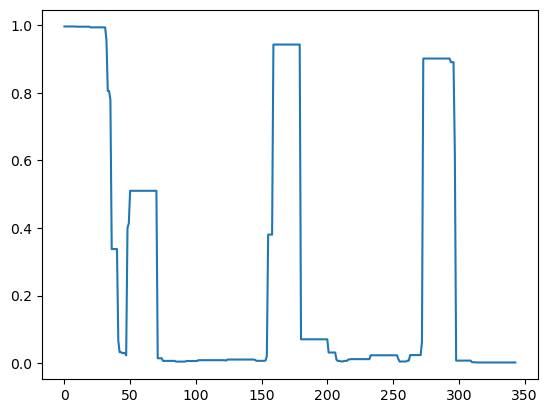

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.9938

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
8            8                1        0.0034        0.9966
3            3                1        0.0035        0.9965
19          19                1        0.0040        0.9960
9            9                1        0.0044        0.9956
5            5                1        0.0046        0.9954
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


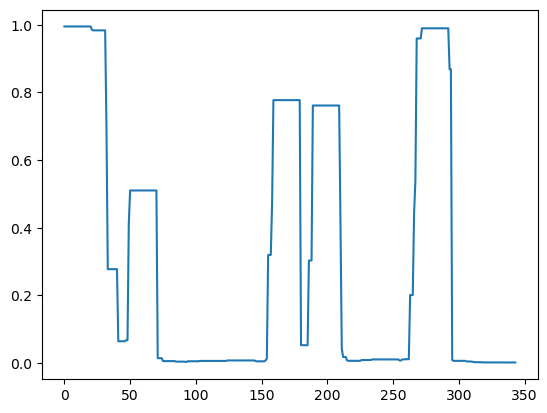

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.965

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
20           20                1        0.0051        0.9949
19           19                1        0.0092        0.9908
292         292                1        0.0105        0.9895
21           21                1        0.0154        0.9846
31           31                1        0.0166        0.9834
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


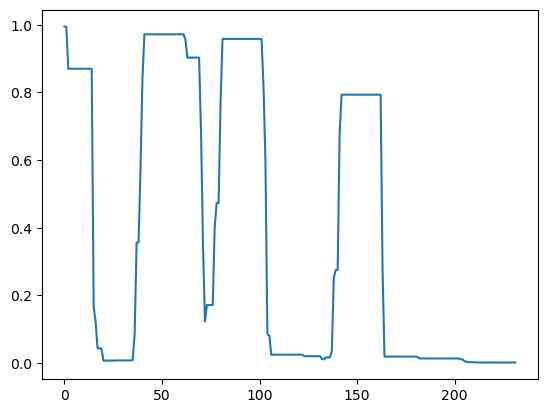

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9949

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                1        0.0051        0.9949
1             1                1        0.0060        0.9940
61           61                1        0.0283        0.9717
101         101                1        0.0418        0.9582
62           62                1        0.0429        0.9571
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


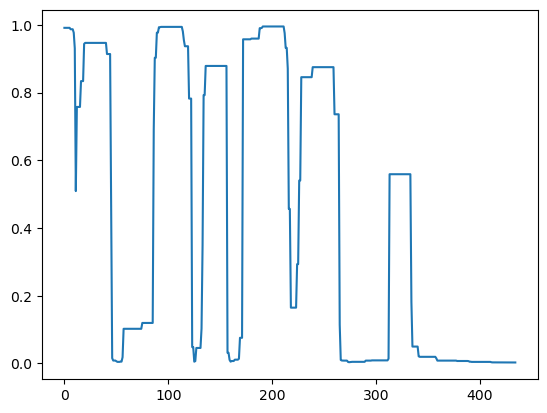

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9904

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
211         211                1        0.0046        0.9954
113         113                1        0.0058        0.9942
111         111                1        0.0068        0.9932
5             5                1        0.0086        0.9914
210         210                1        0.0088        0.9912
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


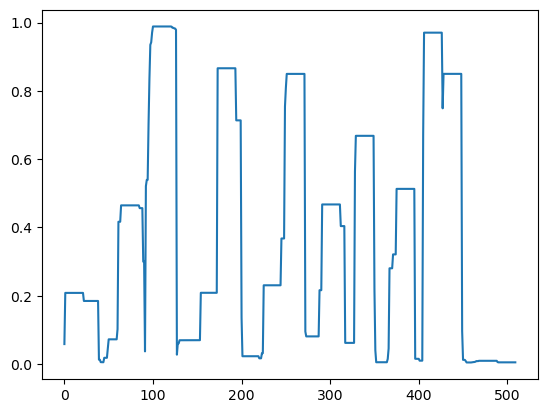

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.0035

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
120         120                1        0.0114        0.9886
121         121                1        0.0119        0.9881
123         123                1        0.0153        0.9847
124         124                1        0.0169        0.9831
125         125                1        0.0174        0.9826
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVS

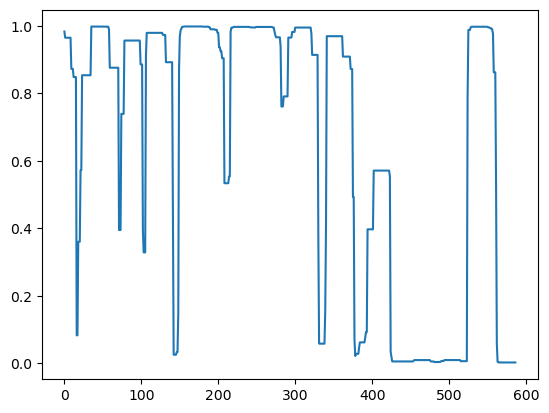

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.6994

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
176         176                1        0.0017        0.9983
177         177                1        0.0017        0.9983
179         179                1        0.0017        0.9983
175         175                1        0.0019        0.9981
55           55                1        0.0019        0.9981
index of true 130


In [14]:
# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # mau. preve mt coisa

# transformer pequeno ES2bT68M + LSTM

# seq representations
# model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # predicts a lot/ everything
# model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # better but predicts a lot
# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # better but predicts a lot

# # contactrepresentations
# model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # predicts everything .did not run CV scores
# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # predicts entire seq
# model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # predicts entire seqdid not run CV scores



# bigger transformer   ES2bT33 + LSTM    So experimentei uma. pode n ser a melhor

# model_name_specific =  'dl/all_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo   now is empty. so accidentaly deleted
model_name_specific =  'dl/third_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # predicts a lot of things
model_name_specific =  'dl/half_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # predicts a lot of things


output(model_name_specific)


# Transformers fine tuned 3 epochs

################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


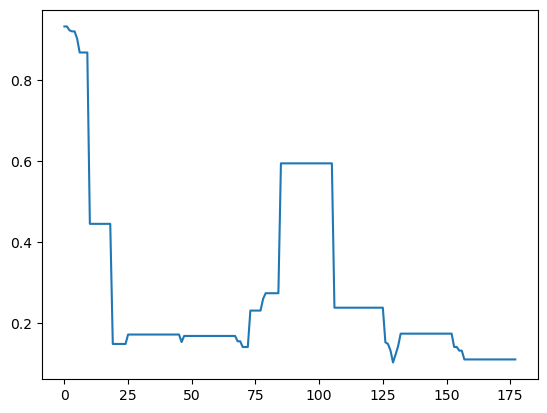

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.9321970343589784

 max score predicted

 top scores
   Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
1           1  LABEL_1  0.932197                1      0.067803      0.932197
2           2  LABEL_1  0.922692                1      0.077308      0.922692
4           4  LABEL_1  0.920110                1      0.079890      0.920110
3           3  LABEL_1  0.919101                1      0.080899      0.919101
0           0  LABEL_1  0.909552                1      0.090448      0.909552
index of true 1
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


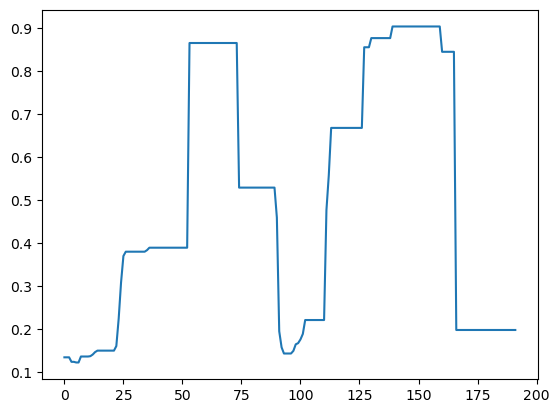

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.1594460606575012

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
159         159  LABEL_1  0.904603                1      0.095397   
150         150  LABEL_1  0.877478                1      0.122522   
73           73  LABEL_1  0.866143                1      0.133857   
147         147  LABEL_1  0.856186                1      0.143814   
165         165  LABEL_1  0.845585                1      0.154415   

     prob_class_1  
159      0.904603  
150      0.877478  
73       0.866143  
147      0.856186  
165      0.845585  
index of true 74
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp mod

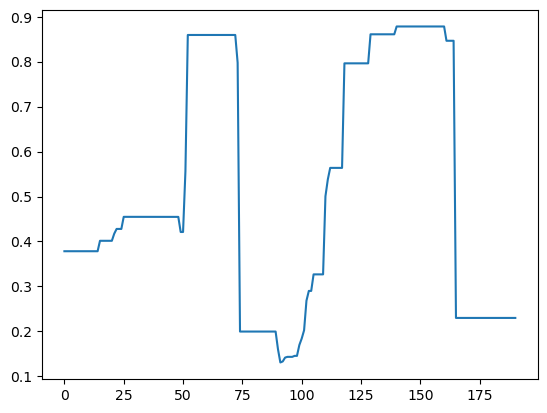

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
score vfp predicted: 0.7975963354110718

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
160         160  LABEL_1  0.878349                1      0.121651   
149         149  LABEL_1  0.860887                1      0.139113   
72           72  LABEL_1  0.859430                1      0.140570   
164         164  LABEL_1  0.846527                1      0.153473   
73           73  LABEL_1  0.797596                1      0.202404   

     prob_class_1  
160      0.878349  
149      0.860887  
72       0.859430  
164     

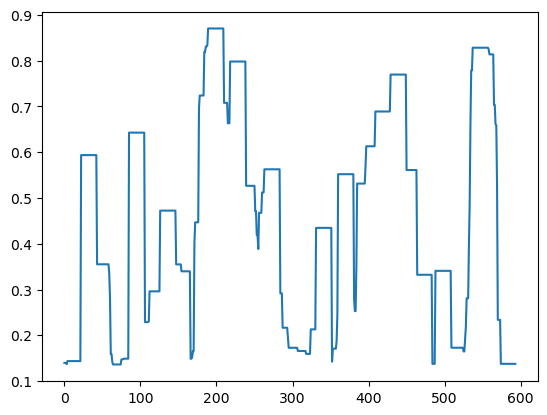

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 1
score vfp predicted: 0.8193848133087158

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
209         209  LABEL_1  0.870378                1      0.129622   
208         208  LABEL_1  0.833885                1      0.166115   
206         206  LABEL_1  0.831029                1      0.168971   
557         557  LABEL_1  0.828409                1      0.171591   
558         558  LABEL_1  0.824588                1      0.175412   

     prob_class_1  
209      0.870378  
208      0.833885  
206      0.831029  
557      0.828409  
558      0.824588  
index of true 204
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


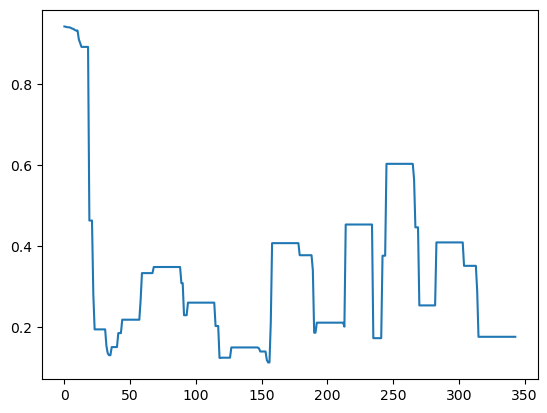

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9416077136993408

 max score predicted

 top scores
   Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
0           0  LABEL_1  0.941608                1      0.058392      0.941608
1           1  LABEL_1  0.940932                1      0.059068      0.940932
2           2  LABEL_1  0.939880                1      0.060120      0.939880
4           4  LABEL_1  0.939547                1      0.060453      0.939547
5           5  LABEL_1  0.937779                1      0.062221      0.937779
index of true 0
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


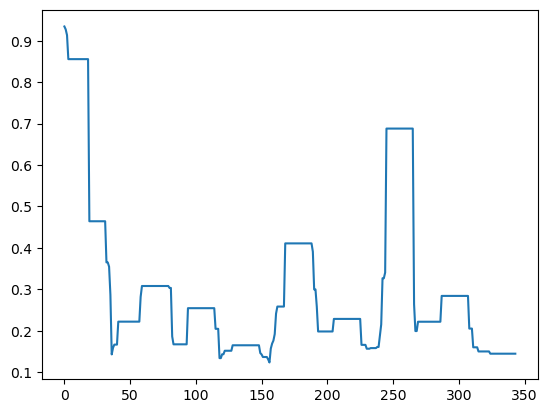

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
score vfp predicted: 0.9342625737190248

 max score predicted

 top scores
    Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
0            0  LABEL_1  0.934263                1      0.065737      0.934263
1            1  LABEL_1  0.927236                1      0.072764      0.927236
2            2  LABEL_1  0.913314                1      0.086686      0.913314
18          18  LABEL_1  0.855475                1      0.144525      0.855475
3            3  LABEL_1  0.786729                1      0.213271      0.786729
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


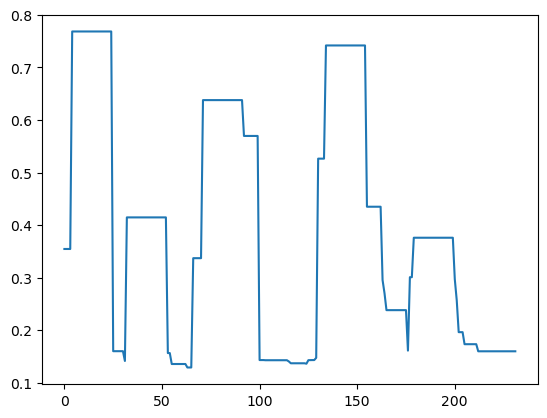

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0
score vfp predicted: 0.1787582635879516

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
24           24  LABEL_1  0.768535                1      0.231465   
154         154  LABEL_1  0.741891                1      0.258109   
91           91  LABEL_1  0.637918                1      0.362082   
99           99  LABEL_1  0.569738                1      0.430262   
150         150  LABEL_1  0.526536                1      0.473464   

     prob_class_1  
24       0.768535  
154      0.741891  
91       0.637918  
99       0.569738  
150      0.526536  
index of true 0
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


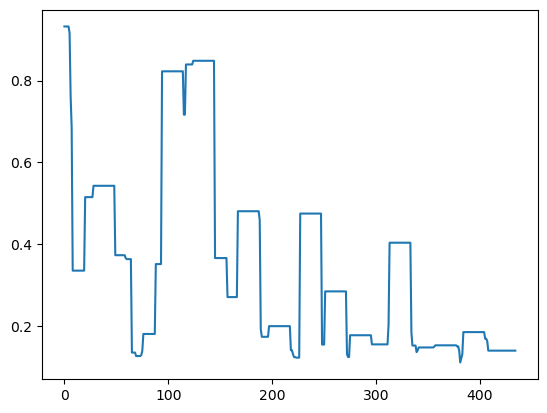

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9288612008094788

 max score predicted

 top scores
   Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
4           4  LABEL_1  0.932033                1      0.067967      0.932033
2           2  LABEL_1  0.929849                1      0.070151      0.929849
3           3  LABEL_1  0.929701                1      0.070299      0.929701
0           0  LABEL_1  0.928861                1      0.071139      0.928861
1           1  LABEL_1  0.916975                1      0.083025      0.916975
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


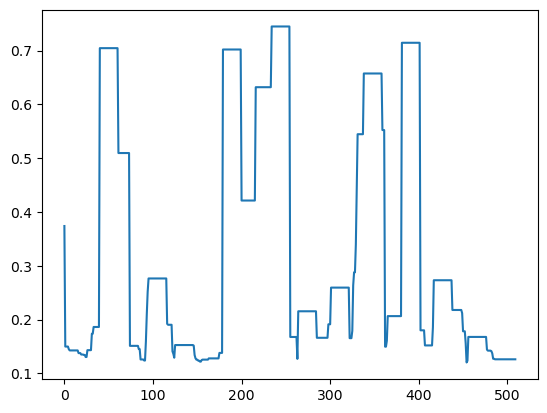

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.3738077282905578

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
254         254  LABEL_1  0.744806                1      0.255194   
401         401  LABEL_1  0.714465                1      0.285535   
60           60  LABEL_1  0.704524                1      0.295476   
199         199  LABEL_1  0.701958                1      0.298042   
358         358  LABEL_1  0.657434                1      0.342566   

     prob_class_1  
254      0.744806  
401      0.714465  
60       0.704524  
199      0.701958  
358      0.657434  
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYE

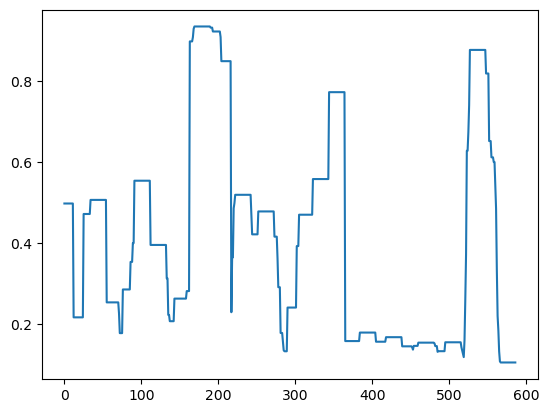

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.160431683063507

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
189         189  LABEL_1  0.935848                1      0.064152   
192         192  LABEL_1  0.933005                1      0.066995   
190         190  LABEL_1  0.931350                1      0.068650   
188         188  LABEL_1  0.930149                1      0.069851   
191         191  LABEL_1  0.929442                1      0.070558   

     prob_class_1  
189      0.935848  
192      0.933005  
190      0.931350  
188      0.930149  
191      0.929442  
index of true 130


In [12]:
# transformers fine tune and predict (no model no hyper changed)
# the smallest   T6 8M 
# model_name_specific = 'dl/esm2b_finetuned/all_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # predicts 2 correct. do not predict anything else
model_name_specific = 'dl/esm2b_finetuned/third_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # better. predicts 4 correct. 1 TMD
# model_name_specific = 'dl/esm2b_finetuned/half_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # it gets correct. but predicts a lot sequences

model_name_specific = 'dl/esm2b_finetuned/all_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80'# 4correct . then predicts anything. 1 sarscov
# model_name_specific = 'dl/esm2b_finetuned/third_Window21_gap1_TRANSFORMER_facebook/third_esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80' # 4 CORRECT. 1 wrong (TMD) 2 sarscov
# model_name_specific = 'dl/esm2b_finetuned/half_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80' # predicts everything/to much

output(model_name_specific)

# List of all

In [42]:
# physicochemical with ML and DL 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf_weights' # pessimo gets 2 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'   # pessimo gets 2 
model_name_specific = 'ml/all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc_prob_weights' # its good. miss 4. predicts correct4. 1 predicts a different
# model_name_specific = 'ml/All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # same as above
# model_name_specific = 'ml/All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # do not predict anything

# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc' # predits 3 well. 1 different. and sarscov
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting' # it gets 2 
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf' # it gets 2 


# other models tested 
# model_name_specific = 'ml/Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # really really good ! 
# model_name_specific = 'ml/Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting'  # its worth to see 
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf'  # # model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting'  # its worth to see 
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'  #  weak. predits everything

# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'  # just1 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_lr'  # acerta alguns F N G L T V L P P L L T D E M I A Q Y T S A L L A 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gnb' # predicts 3   
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_sgd' # predicts 2 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # 3 are ok
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # nice to SEE outros n dá nada. 0 e 1 (n tem prob) 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_linear_svc' # hALF is good 
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_knn' # predicts evrything 

# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf' # 3 right. the rest nothing. 



# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # deu sempre as primeiras sequencias
# model_name_specific = 'dl/third_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # pessimo. tb dá tudo

# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2' # pessimo. tb dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_att_bayesian_cwei'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 

# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV2' #  melhor mas pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV4'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'




# WE method in each protein gets 100 dim
 
model_name_specific = 'all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc'  #  fiz overwrite sem querer. é WEmetod3 recorrer
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf' # mau    # fiz overwrite sem querer. é WEmetod3 recorrer
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gboosting' # mau
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # ver este
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # há piores

model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # mau 
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn'  
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # há piores

model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # mau
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # mau
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # mau



# method 1 19*100
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # prevÊ 3 xb   FEZ OVERWRITE DOS DE CIMA
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf'
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # há piores
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_knn' # mau


model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # pessimo
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # mau


model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # pessimo
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # ver


model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm1' # nao é mau 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm2' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm3' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm4' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm5' #  ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm6' # nao é mau ver



# transformers fine tune and predict (no model no hyper changed)
# the smallest
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # mau 
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # melhor mas mau na mesma 
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80'

model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80' # preve mt coisa
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_esm2_t36_3B_UR50D_finetune_class_10groupedKFOLD_cluster80' # preve mt coisa
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80'# prevê 4


# get the representations nad feed to a model ãfinal é pretrained.esm2_t33_650M_UR50D    (esqueci me de mudar a string)
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve 4 
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau


# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # acerta quase todos mas tb outros 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau no geral 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb'

# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # mau. preve mt coisa
# model_name_specific ='ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau pior q third
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau mas ja vi pior 


# # o pequeno 
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve 6
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # pessimo
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau

# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve mt coisa0
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # 

# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve mt coisa0
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau



# transformer pequeno ES2bT68M + LSTM

# seq representations
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # mau 
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo

# contactrepresentations
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # literalmente a seq toda ahah
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # did not run CV scores
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # did not run CV scores



# transformer maior  ES2bT33 + LSTM    So experimentei uma. pode n ser a melhor

model_name_specific =  'dl/half_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
model_name_specific =  'dl/third_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
# model_name_specific =  'dl/all_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 


# output(model_name_specific)

In [7]:
# os scores tÊm de avancar para a frente 
# score do vfp quando tem mais q 21 aa 
# get the vfp predicted (more correctly) 

